In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
# To ignore warnings
import warnings

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline
%matplotlib inline


In [2]:
employee_df = pd.read_csv('Employee.csv')

In [3]:
employee_df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
# Dropping Column 'Joining Year'

employee_df = employee_df.drop(columns='JoiningYear')

In [6]:
# Dropping Column 'age'

employee_df = employee_df.drop(columns='Age')

In [7]:
employee_df = employee_df.drop(columns='PaymentTier')

In [8]:
employee_df = employee_df.drop(columns='City')

### About the Datasets:

1) Education - Education of the employee - {Bachelors,Masters,Phd}
2) PaymentTier - Type of payments - {1,2,3}.
3) Age - Age of the employee - {20-45}.
4) EverBenched - Whether the employee has ever been on bench-means he/she wasnt working on any project - {'Yes','No'}.
5) ExperienceInCurrentDomain - How much experience an employee has in current domain?

6) LeaveOrNot - Which employee will leave the organizaion? - {0,1}

# Payment Tier


1.PaymentTier-1-->Tier 1 Payment means all amounts paid or otherwise owing to PSL under the Paybridge Contract with respect to revenues generated as fees and/or float, after sales commissions, for clients referred to PayBridge by PSL.

2.PaymentTier-2-->Tier 2 means all amounts paid or otherwise owing to PSL under the Paybridge Contract with respect to revenues generated as fees and/or float for clients referred to PayBridge by other service providers that were introduced to PayBridge by PSL.

3.PaymentTier-3-->Tier 3 Employee means any Senior Vice President of the Company or any of its Affiliates, and any other employee of the Company or any of its Affiliates designated as such by the Plan Administrator in writing.


In [9]:
employee_df.head(10)

,Education,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,Male,No,0,0
1,Bachelors,Female,No,3,1
2,Bachelors,Female,No,2,0
3,Masters,Male,No,5,1
4,Masters,Male,Yes,2,1
5,Bachelors,Male,No,0,0
6,Bachelors,Male,No,0,0
7,Bachelors,Female,No,2,1
8,Bachelors,Male,No,1,0
9,Masters,Male,No,2,0


In [10]:
employee_df.shape

(4653, 5)

In [11]:
# To check for null values.
employee_df.isna().sum()

Education                    0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [12]:
employee_df.head(10)

,Education,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,Male,No,0,0
1,Bachelors,Female,No,3,1
2,Bachelors,Female,No,2,0
3,Masters,Male,No,5,1
4,Masters,Male,Yes,2,1
5,Bachelors,Male,No,0,0
6,Bachelors,Male,No,0,0
7,Bachelors,Female,No,2,1
8,Bachelors,Male,No,1,0
9,Masters,Male,No,2,0


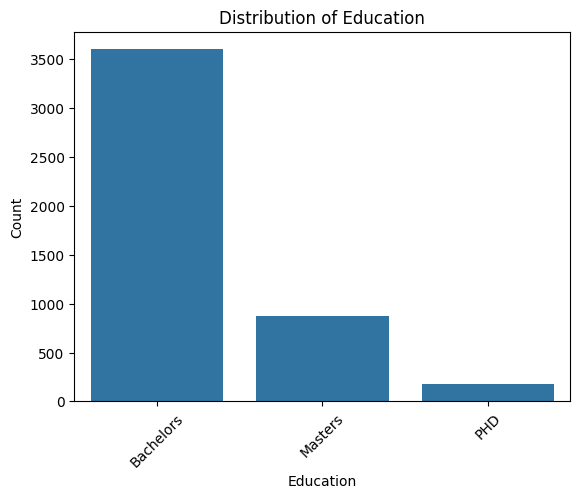

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Education' is the column name in your DataFrame
sns.countplot(x='Education', data=employee_df)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


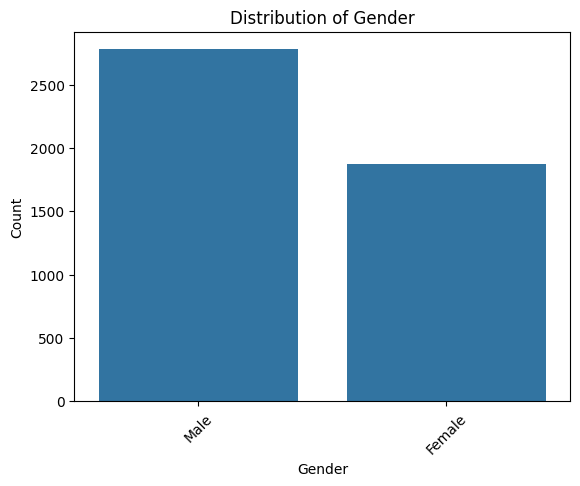

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Education' is the column name in your DataFrame
sns.countplot(x='Gender', data=employee_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
pd.crosstab(employee_df['Gender'],employee_df['LeaveOrNot'],margins=True).style.background_gradient(cmap='Greys')


LeaveOrNot,0,1,All
Gender,,,
Female,991,884,1875
Male,2062,716,2778
All,3053,1600,4653


In [16]:
employee_df.columns

Index(['Education', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')

<Axes: xlabel='EverBenched', ylabel='count'>

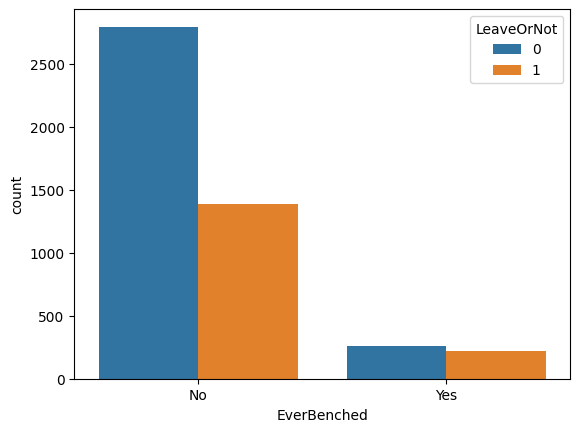

In [17]:
sns.countplot(data = employee_df ,x='EverBenched',hue='LeaveOrNot')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

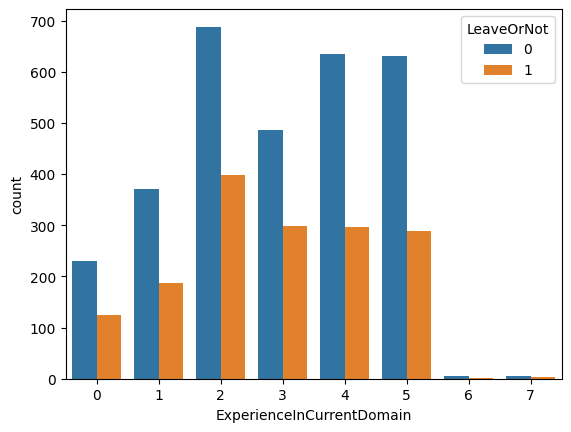

In [18]:
sns.countplot(data = employee_df ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

<Axes: xlabel='Gender', ylabel='count'>

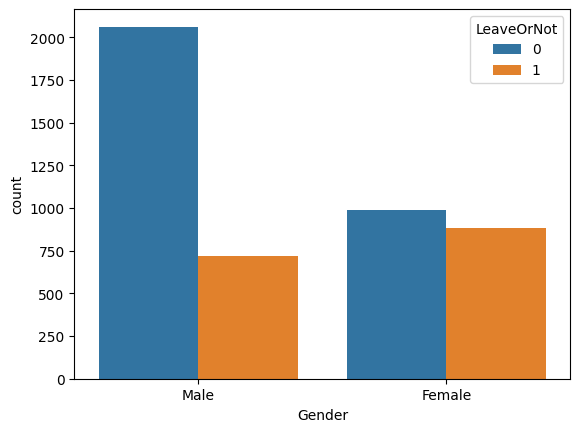

In [19]:
# Leave or not by Gender: 0 Means they choose not to leave

sns.countplot(data = employee_df ,x='Gender',hue='LeaveOrNot')

In [46]:
# employee_df['PaymentTier'] = employee_df['PaymentTier'].astype('category')
# sns.countplot(data = employee_df ,x='PaymentTier',hue='LeaveOrNot')

In [21]:
# I like this code

pd.crosstab(employee_df['Education'],employee_df['LeaveOrNot'],margins=True).style.background_gradient(cmap='Greys')

LeaveOrNot,0,1,All
Education,,,
Bachelors,2472,1129,3601
Masters,447,426,873
PHD,134,45,179
All,3053,1600,4653


<Axes: xlabel='Education', ylabel='count'>

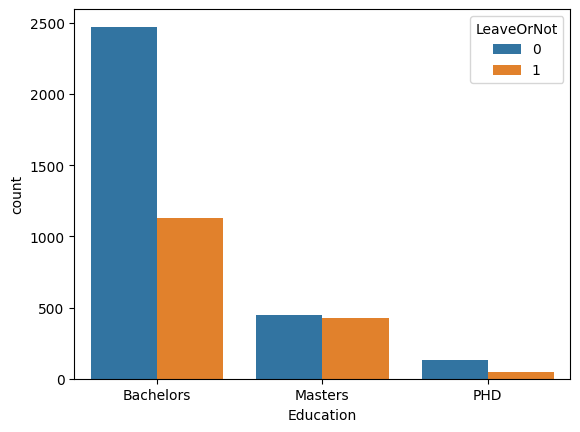

In [22]:
sns.countplot(data = employee_df ,x='Education',hue='LeaveOrNot')

In [23]:
employee_df.head()

,Education,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,Male,No,0,0
1,Bachelors,Female,No,3,1
2,Bachelors,Female,No,2,0
3,Masters,Male,No,5,1
4,Masters,Male,Yes,2,1


In [24]:
employee_df.dtypes

Education                    object
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

# Feature Engineering

In [25]:
employee_df.columns

Index(['Education', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')

In [26]:
# تحويل الأعمدة النصية إلى أرقام
employee_df['Education'] = employee_df['Education'].map({'Bachelors': 1, 'Masters': 2, 'PHD': 3, 'Diploma': 4})
employee_df['Gender'] = employee_df['Gender'].map({'Male': 1, 'Female': 0})
employee_df['EverBenched'] = employee_df['EverBenched'].map({'Yes': 1, 'No': 0})


In [27]:
employee_df.dtypes

Education                    int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

In [47]:
# Prepare data
X = employee_df.drop(['LeaveOrNot'], axis=1)
y = employee_df['LeaveOrNot']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)


# # sacle the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [48]:
# dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [32]:
param_grid = {
    'max_depth': [4,5, 6, 7, 10, 15,20],   # Regularization strength
    'n_estimators':[35,75,80,85,90,95,100]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [33]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 10, 15, 20],
                         'n_estimators': [35, 75, 80, 85, 90, 95, 100]},
             scoring='f1_macro', verbose=1)

In [35]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 35}

In [36]:
best_model = grid_search.best_estimator_

------

In [37]:

y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

In [38]:
# our benchmark model
base_model = round(employee_df['LeaveOrNot'].value_counts()[1]/employee_df.shape[0]*100, 2)
base_model

34.39

In [39]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.6745435016111708

In [40]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.6792047286405158

In [41]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.6788399570354458

In [42]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.6778613648576034

In [43]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.60


In [44]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.60


# Building Model

In [45]:
import joblib
joblib.dump(rf_classifier, 'rf_model.joblib')
#joblib.dump(scaler, 'Models/scaler.joblib')

['rf_model.joblib']